# Finding a Path Through a Maze

## Group Names and Roles

- Partner 1 (Role)
- Partner 2 (Role)
- Partner 3 (Role)

Don't forget to *rotate your roles*. The Driver from last time is now the Proposer, the Proposer from last time is now the Reviewer, and the Reviewer from last time is now the Driver. 

Remember, completing the worksheet is great for your understanding but not necessary to receive a full participation grade in Discussion. Whatever you are able to achieve in the Discussion section will usually be fine. That said, you are heartily encouraged to make additional time to complete any parts that you may not have gotten to during the scheduled Discussion. 

## Introduction 

In this activity, we'll write a simple program that finds a path through a maze. Here's what our maze looks like: 

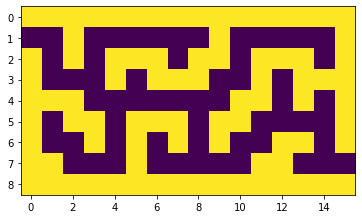

In the above maze, **walls** are yellow, and passable space is dark purple. We start the maze in the empty space at `(1, 0)` -- where we write the **row first**, followed by the column (opposite of the usual graph notation). At each step, we can move up, down, left, or right, but not diagonally. Our goal is to come out of the other side of the maze, i.e. to end up at `(7, 15)`.

Start by running the next cell.

In [2]:
from matplotlib import pyplot as plt
import copy

In the above two lines, we are importing the modules we'll use for our program. `pyplot` from `matplotlib` will allow us to draw a picture of our maze, just like the one above. We will explain why we need `copy` once we get there.

We've given you the main routine for the program. There are several functions called inside this routine, which you will need to write. The calls are currently commented out so that you may uncomment them as you implement the functions, one by one. The entire working code of the program will thus be separated into self-contained functions, including the main routine (to avoid using the global scope).

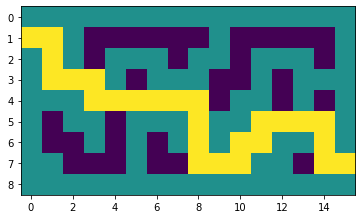

In [9]:
def main():
    maze_str = """
++++++++++++++++
  +      +     +
+ + +++ ++ +++ +
+   + +++  + +++
+++       ++ + +
+ ++ +++ ++    +
+  + + + +  ++ +
++   +     ++   
++++++++++++++++
    """
    start = (1, 0)
    end = (7, 15)
    maze = build_maze(maze_str)
    #plot_maze(maze)
    path = solve_maze(maze, start, end)
    plot_maze_solution(maze, path)
    

if __name__ == '__main__':
    main()

`maze_str` is a string representation of the maze from the picture above; `+` is a wall and a single space character is passable space. Note that triple quotes are used to define a string across multiple lines. `start` and `end` are the positions for where we start and where we want to end up in the maze, as explained in the beginning.

`if __name__ == '__main__'` is an idiom that you will frequently encounter when constructing Python modules, although it is somewhat less common within notebooks. `__name__` is a special variable set by the interpreter; roughly speaking, it is set equal to the string `'__main__'` whenever your code is run directly, rather than imported as a module. In our program, this will result in running the `main` routine when you run the cell.

The idea is that if you were writing this code in a Python script, somebody may want to recycle the functions that you will develop here by importing your module (but not run the `main` routine). Because of this check, the `main` routine won't run in that scenario, but the functions defined will be made available to whatever script imported your code.

## §A. Write `build_maze()`




In the code cell below, declare and implement the `build_maze` function. The function needs to take a string like `maze_str` in the `main` function above and turn it into a two-dimensional list of integers (list of lists of integers), where the inner lists are rows of wall or empty space, `0` is empty space, and `1` is a wall.

For instance, the list `[[1, 1, 1], [1, 1, 0], [1, 1, 1]]` would represent a 3x3 block of walls with an empty space carved out in the middle right.

The function `build_maze` ought to take around 6 lines.

**Note**: before you split the maze string across lines, you should call `.strip()` on it -- this will trim the whitespace from the ends of it.

***Hint***: Use `str.split("\n")` to parse `maze_str` line-by-line. 
***Hint***: Recall that `L[-1]` refers to the final element of a list `L`. 

In [4]:
def build_maze(maze_str):
    maze = []
    for line in maze_str.strip().split('\n'):
        maze.append([])
        for char in line:
            maze[-1].append(1 if char == '+' else 0)
    return maze

## §B. Write `plot_maze()`. 

In the code cell below, declare and implement the `plot_maze` function. The function takes a maze coded as a list (not string), and uses a module we imported to make a picture of the maze, just like the one above. This is just one line -- a call to `plt.imshow` with the maze object.

In [5]:
def plot_maze(maze):
    plt.imshow(maze)

The function `solve_maze` takes a maze object `maze`, the starting position `start`, and the ending position `end`; and it returns a list of positions (two-integer tuples) of every square that we visit along the way from start to end. Check the `main` routine above to see how this function is called.

## §C. Write `choose_valid_move()`. 

Eventually, we would like to implement a `solve_maze()` function. Here's the idea: 

- Declare a list called `path` that keeps track of the path, containing only the tuple `start`. The last element of this list is your "current position". 
- In a loop:
    - Replace the square in the maze at your current position with `2` -- a visited square. 
    - Then look for any adjacent square that you can move to which has not yet been visited. If there are no such squares, backtrack (throw away elements from the end of the path).

To do this, we need to write a helper function that takes the maze and the current position and returns the location of the next square to try moving to. It should take around 5 lines. 

**Note:** there are many ways to implement this function. It's sufficient for your function to choose *any* valid move. If there are multiple, you can pick one at random, always choose the first one you see, or any other approach. 

In [6]:
# pos = (0, 0)

def choose_valid_move(maze, pos):
    for d in [(0,1), (1,0), (0,-1), (-1,0)]:
        new = (pos[0]+d[0], pos[1]+d[1]) # new = (1, 0)
        if maze[new[0]][new[1]] == 0:    # there's a 0 here
            return new                   # return (1, 0), function exits
    return None

---

If you've made it this far, great job! If there are more than 5 minutes left in Discussion, go ahead and continue on to the remaining parts, in which you'll use your functions from above to fully solve the maze. Otherwise, feel free to submit your worksheet. Finding some time to work with your group to complete the worksheet is optional but heartily recommended. 

---

## §D. Write `solve_maze()`. 

Using the `choose_valid_move()` function that you wrote above, write the `solve_maze` function according to the outline in §C.

There is only one technicality. In order to mark the spaces already visited, you have to change the `maze` object passed to the function. Because lists are mutable, this will end up changing the original copy, which we want to avoid. So we use `copy` to make a copy of the maze first. Fill in the function below. It should take around 13 lines.

In [7]:
def solve_maze(maze, start, end):
    maze = copy.deepcopy(maze)

    path = [start]
    while path and path[-1] != end:
        maze[path[-1][0]][path[-1][1]] = 2
        next_pos = choose_valid_move(maze, path[-1])
        if next_pos:
            path.append(next_pos)
        else:
            path = path[:-1]
    return path

## §E. Write `plot_maze_solution()`. 

Lastly, write the `plot_maze_solution()` function in the code cell below. The function ought to take a maze and a path, and mark the squares along the path with a different value (`2` as before will work), then plot the maze. Remember to make a deep copy of the maze again, just as above, since otherwise you would be changing the original list that is passed as an argument to the function. This function ought to take around 4 lines.

In [8]:
def plot_maze_solution(maze, path):
    maze = copy.deepcopy(maze)

    for pos in path:
        maze[pos[0]][pos[1]] = 2
    plt.imshow(maze)

**Run each of your code cells and the `main` routine above, with all the function calls uncommented.** (You may have to comment out one of the `plot_` function calls, since you can only see one plot at a time.)

Try commenting out the `copy.deepcopy` lines from your code, and run it again, showing the solution. Discuss with your group what goes wrong.

Now make your own maze -- add a second maze string to the `main` routine above with a maze of your own, and run your program to solve it.